Importing necessary libraries for data manipulation, visualization, and machine learning

In [194]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier



Loading the train and test datasets into pandas DataFrames

In [195]:
# Loading datasets
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')


Exploratory Data Analysis: Performing basic EDA to understand the structure and distribution of the data
This includes inspecting the first few rows, data types, summary statistics, and missing values


In [196]:
# Basic EDA
print(train.head())
print(train.info())
print(train.describe())
print(train.isnull().sum())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
<c

Visualizing the distribution of the 'Age' feature using a histogram

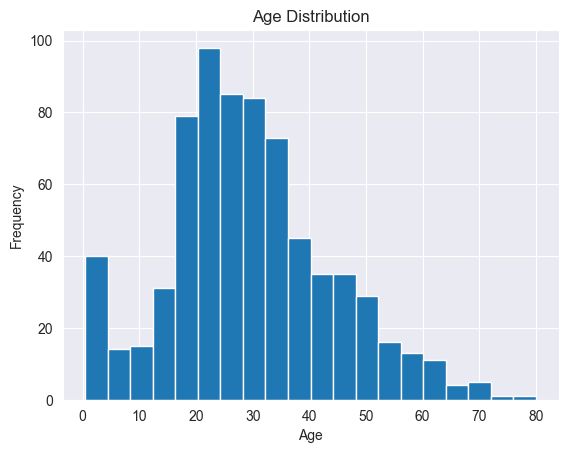

In [197]:
# Plotting Age Distribution
train['Age'].hist(bins=20)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

Using a bar plot to visualize the survival rates based on passenger sex

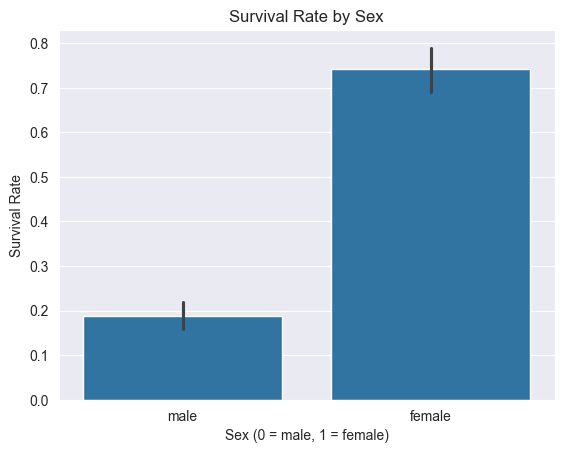

In [198]:
# Plotting Survival Rates by Sex
sns.barplot(x='Sex', y='Survived', data=train)
plt.title('Survival Rate by Sex')
plt.xlabel('Sex (0 = male, 1 = female)')
plt.ylabel('Survival Rate')
plt.show()

Using a box plot to visualize the relationship between age and survival

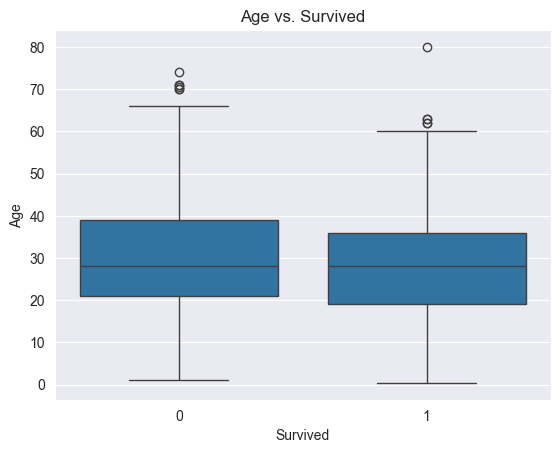

In [199]:
# Plotting Age vs. Survived
sns.boxplot(x='Survived', y='Age', data=train)
plt.title('Age vs. Survived')
plt.show()

Visualizing the distribution of embarkation points using a pie chart

<Axes: ylabel='count'>

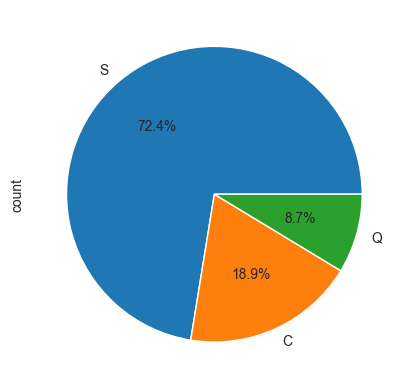

In [200]:
# Plotting Embarked Distribution
train['Embarked'].value_counts().plot(kind = "pie", autopct = "%0.1f%%")

Using a count plot to visualize the count of survivors across different passenger classes

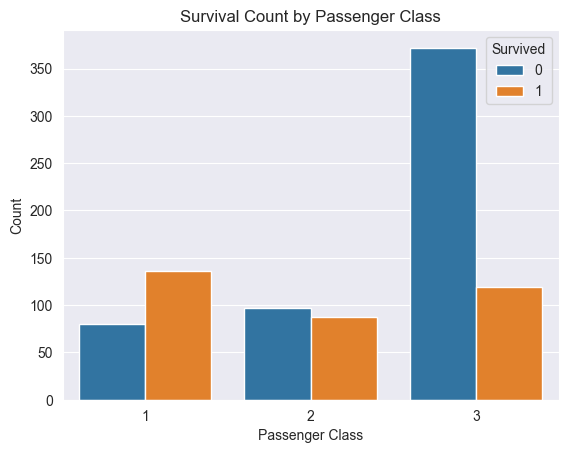

In [201]:
# Plotting Survival Count by Passenger Class
sns.countplot(x='Pclass', hue='Survived', data=train)
plt.title('Survival Count by Passenger Class')
plt.ylabel('Count')
plt.xlabel('Passenger Class')
plt.legend(title='Survived', loc='upper right')
plt.show()

Preprocessing data

In [202]:
# Handling Missing Values

# Age: Impute missing values using the median
train['Age'].fillna(train['Age'].median(), inplace=True)
# Embarked: Impute missing values with the most frequent value
train['Embarked'].fillna(train['Embarked'].mode()[0], inplace=True)
# Cabin: This column has a lot of missing values, we will drop this column
train = train.drop(columns=['Cabin'])

/var/folders/vm/tx5_p67536gbw9nt3vl758cm0000gn/T/ipykernel_1150/3972758258.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['Age'].fillna(train['Age'].median(), inplace=True)
/var/folders/vm/tx5_p67536gbw9nt3vl758cm0000gn/T/ipykernel_1150/3972758258.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting value

In [203]:
# Creating new feature
train['FamilySize'] = train['SibSp'] + train['Parch'] + 1
train['Single'] = (train['FamilySize'] == 1).astype(int)
train = train.drop(columns=['SibSp', 'Parch'])

# Dropping columns that are not useful for now
train = train.drop(columns=['Name', 'Ticket'])

In [204]:
train = pd.get_dummies(train, columns=['Sex', 'Embarked'], drop_first=True)
train.head()

,PassengerId,Survived,Pclass,Age,Fare,FamilySize,Single,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,22.0,7.2500,2,0,True,False,True
1,2,1,1,38.0,71.2833,2,0,False,False,False
2,3,1,3,26.0,7.9250,1,1,False,False,True
3,4,1,1,35.0,53.1000,2,0,False,False,True
4,5,0,3,35.0,8.0500,1,1,True,False,True


Splitting the data into training and testing sets

In [205]:
# Splitting data
X = train.drop(columns=['PassengerId', 'Survived'])
y = train['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Model Selection & Model Deployment: Train and evaluate multiple models using GridSearchCV to find the best hyperparameters

In [206]:
# Logistic Regression
log_reg = LogisticRegression(max_iter=1000)

# Hyperparameters to search
param_grid = {
    'logisticregression__C': [0.01, 0.1, 1, 10, 100],
    'logisticregression__penalty': ['l1', 'l2'],
    'logisticregression__solver': ['liblinear'],
}

# Create a pipeline with a scaler and logistic regression
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('logisticregression', log_reg)
])

# GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)


# Best parameters and best score
print("Best parameters found by GridSearchCV:", grid_search.best_params_)
print("Best accuracy score from GridSearchCV:", grid_search.best_score_)

# Evaluate on the Test Set
best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
print("Test set accuracy:", test_accuracy)
report = classification_report(y_test, y_pred)
print(f'Classification Report:\n{report}')

Best parameters found by GridSearchCV: {'logisticregression__C': 1, 'logisticregression__penalty': 'l1', 'logisticregression__solver': 'liblinear'}
Best accuracy score from GridSearchCV: 0.8033290653008963
Test set accuracy: 0.7932960893854749
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.85      0.83       105
           1       0.77      0.72      0.74        74

    accuracy                           0.79       179
   macro avg       0.79      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179


In [207]:
# Random Forest Classifier
rf_clf = RandomForestClassifier(random_state=42)

# Define the pipeline with scaler and model
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('randomforest', rf_clf)
])

# Define hyperparameters for GridSearchCV
param_grid = {
    'randomforest__n_estimators': [50, 100, 200],
    'randomforest__max_depth': [None, 10, 20, 30],
    'randomforest__min_samples_split': [2, 5, 10],
    'randomforest__min_samples_leaf': [1, 2, 4]
}

# Perform GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best parameters and best score
print("Best parameters found by GridSearchCV:", grid_search.best_params_)
print("Best accuracy score from GridSearchCV:", grid_search.best_score_)

# Evaluate on the Test Set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
print("Test set accuracy:", test_accuracy)
report = classification_report(y_test, y_pred)
print(f'Classification Report:\n{report}')

Best parameters found by GridSearchCV: {'randomforest__max_depth': None, 'randomforest__min_samples_leaf': 4, 'randomforest__min_samples_split': 10, 'randomforest__n_estimators': 100}
Best accuracy score from GridSearchCV: 0.8257854821235103
Test set accuracy: 0.8100558659217877
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.90      0.85       105
           1       0.82      0.69      0.75        74

    accuracy                           0.81       179
   macro avg       0.81      0.79      0.80       179
weighted avg       0.81      0.81      0.81       179


Conclusion:
Based on the evaluation metrics and considering the slightly better accuracy and F1-score for predicting survival (class 1), the Random Forest Classifier appears to be the better model for this dataset.

Preprocessing Test data

In [208]:
# Handling Missing Values

# Age: Impute missing values using the median
test['Age'].fillna(test['Age'].median(), inplace=True)
# Embarked: Impute missing values with the most frequent value
test['Embarked'].fillna(test['Embarked'].mode()[0], inplace=True)
# Cabin: This column has a lot of missing values, we will drop this column
test = test.drop(columns=['Cabin'])

/var/folders/vm/tx5_p67536gbw9nt3vl758cm0000gn/T/ipykernel_1150/437766820.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test['Age'].fillna(test['Age'].median(), inplace=True)
/var/folders/vm/tx5_p67536gbw9nt3vl758cm0000gn/T/ipykernel_1150/437766820.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values al

In [209]:
# Creating new feature
test['FamilySize'] = test['SibSp'] + test['Parch'] + 1
test['Single'] = (test['FamilySize'] == 1).astype(int)
test = test.drop(columns=['SibSp', 'Parch'])

# Dropping columns that are not useful for now
test = test.drop(columns=['Name', 'Ticket'])

test = pd.get_dummies(test, columns=['Sex', 'Embarked'], drop_first=True)
test.head()

,PassengerId,Pclass,Age,Fare,FamilySize,Single,Sex_male,Embarked_Q,Embarked_S
0,892,3,34.5,7.8292,1,1,True,True,False
1,893,3,47.0,7.0000,2,0,False,False,True
2,894,2,62.0,9.6875,1,1,True,True,False
3,895,3,27.0,8.6625,1,1,True,False,True
4,896,3,22.0,12.2875,3,0,False,False,True


Predicting on Test Data

In [210]:
# Dropping 'PassengerId' and use the best model to predict on the test set
X_test_val = test.drop(columns=['PassengerId'])
# Performing predictions on the test set using the best model
test_predictions = best_model.predict(X_test_val)

In [211]:
# Creating Submission File
submission = pd.DataFrame({
    'PassengerId': test['PassengerId'], 
    'Survived': test_predictions
})

submission.to_csv('submission.csv', index=False)